In [84]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [73]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df = df.rename(columns={'Work_accident': 'work_accident',
                        'average_montly_hours': 'average_monthly_hours',
                        'time_spend_company': 'tenure',
                        'Department': 'department'})

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [76]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [77]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [78]:
df.duplicated().sum()

3008

In [79]:
df = df.drop_duplicates(keep='first')

In [80]:
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [81]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6, 6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['tenure'])

TypeError: 'module' object is not callable

In [ ]:
df2 = pd.get_dummies(df, columns=['Department'], drop_first=True)
df2['salary'] = df['salary'].map({'low': 0, 'medium': 1, 'high': 2})
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,False,False,False,True,False,False,False,False,False
11996,0.74,0.95,5,266,10,0,0,1,2,False,False,False,True,False,False,False,False,False
11997,0.85,0.54,3,185,10,0,0,1,2,False,False,False,True,False,False,False,False,False
11998,0.33,0.65,3,172,10,0,0,1,2,False,False,False,False,True,False,False,False,False


/var/folders/c2/yfkd2y_x4qj8vhdk3rg0b2cw0000gn/T/ipykernel_81191/2468208170.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['salary'] = df['salary'].str.strip().str.lower().map(


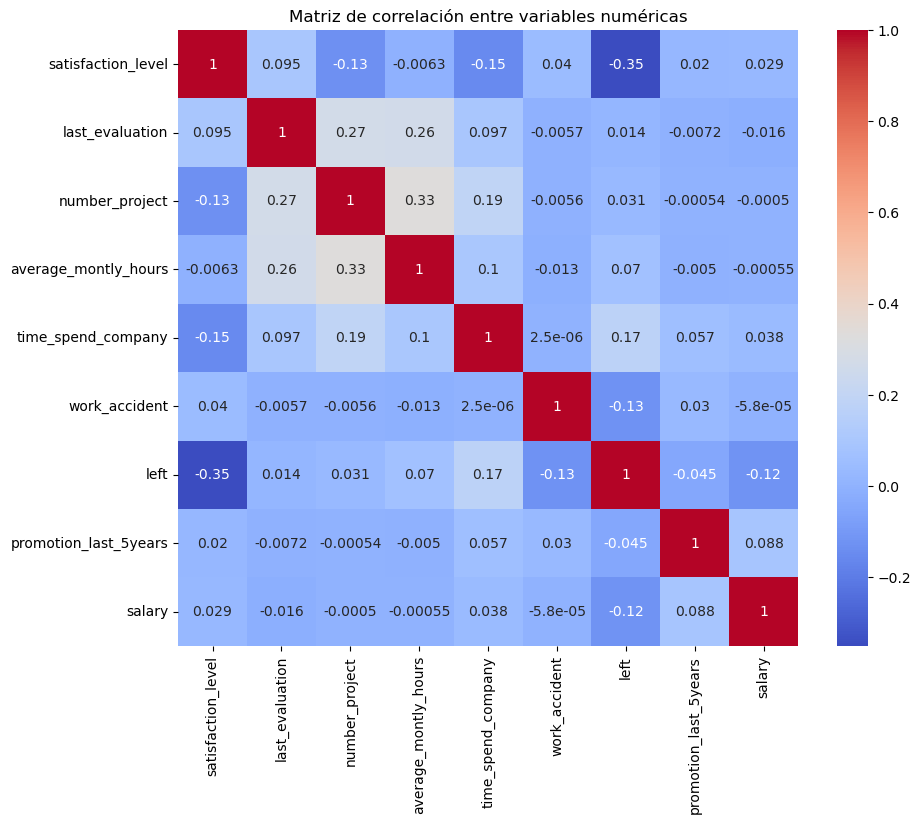


📊 Correlación con 'left':
left                     1.000000
time_spend_company       0.173295
average_montly_hours     0.070409
number_project           0.030928
last_evaluation          0.013520
promotion_last_5years   -0.044657
salary                  -0.118882
work_accident           -0.125436
satisfaction_level      -0.350558
Name: left, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de trabajar con columnas limpias
df.columns = df.columns.str.strip().str.lower()

# Convertir salario a numérico si no lo has hecho aún
df['salary'] = df['salary'].str.strip().str.lower().map(
    {'low': 0, 'medium': 1, 'high': 2})

# Codificar 'department'
df_corr = pd.get_dummies(df, columns=['department'], drop_first=True)

# Filtrar solo variables numéricas
num_df = df_corr.select_dtypes(include='number')

# Calcular matriz de correlación
corr_matrix = num_df.corr()

# Mostrar heatmap completo
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

# Mostrar correlación con la variable 'left'
print("\n📊 Correlación con 'left':")
cor_left = corr_matrix['left'].sort_values(ascending=False)
print(cor_left)

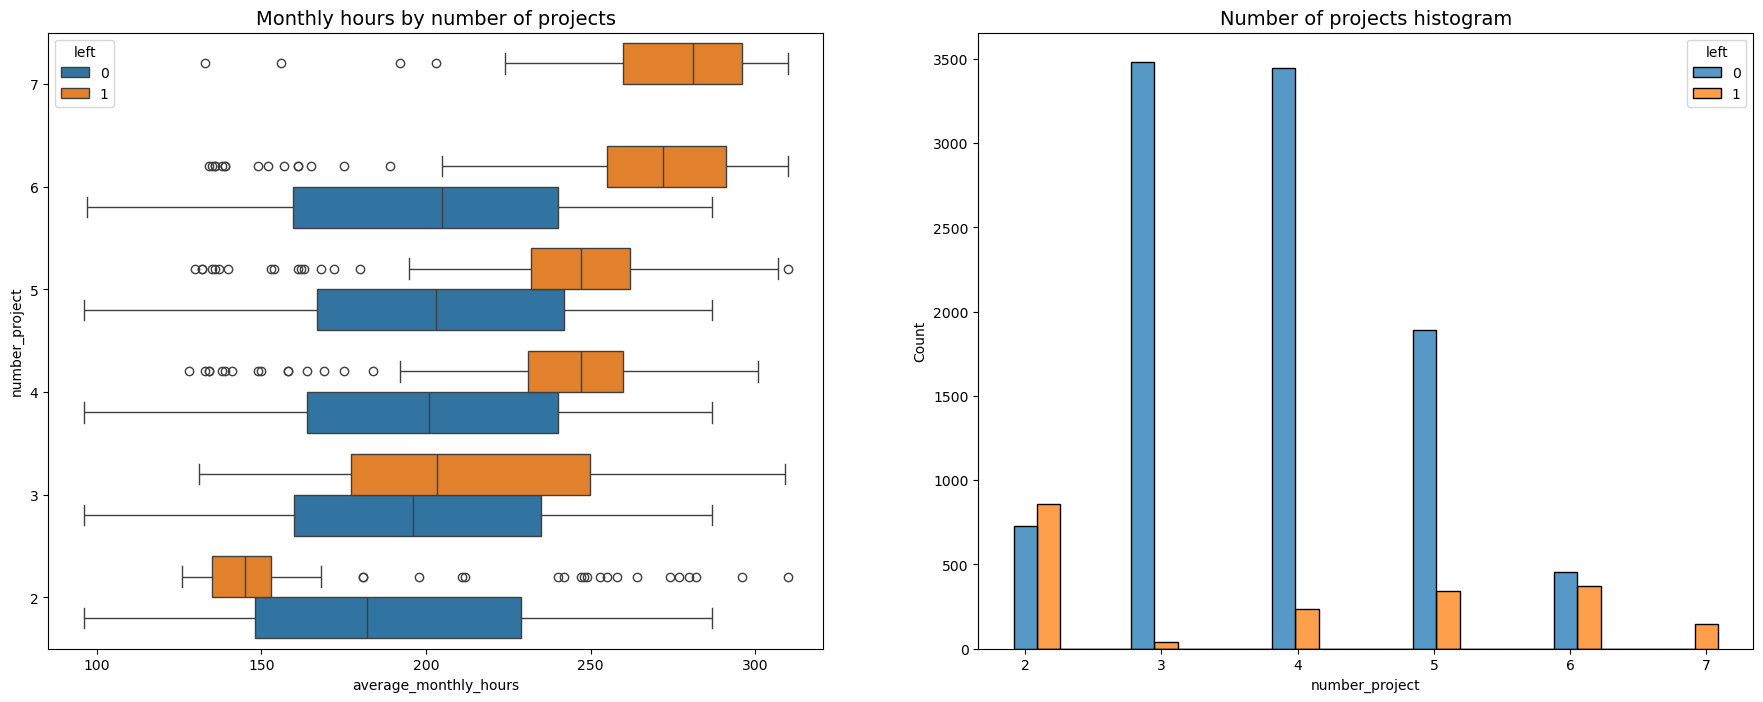

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

sns.boxplot(data=df, x='average_monthly_hours',
            y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

tenure_stay = df[df['left'] == 0]['number_project']
tenure_left = df[df['left'] == 1]['number_project']
sns.histplot(data=df, x='number_project', hue='left',
             multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

In [ ]:
df[['number_project', 'left']].value_counts()

number_project  left
3               0       3482
4               0       3448
5               0       1890
2               1        857
                0        725
6               0        455
                1        371
5               1        343
4               1        237
7               1        145
3               1         38
Name: count, dtype: int64

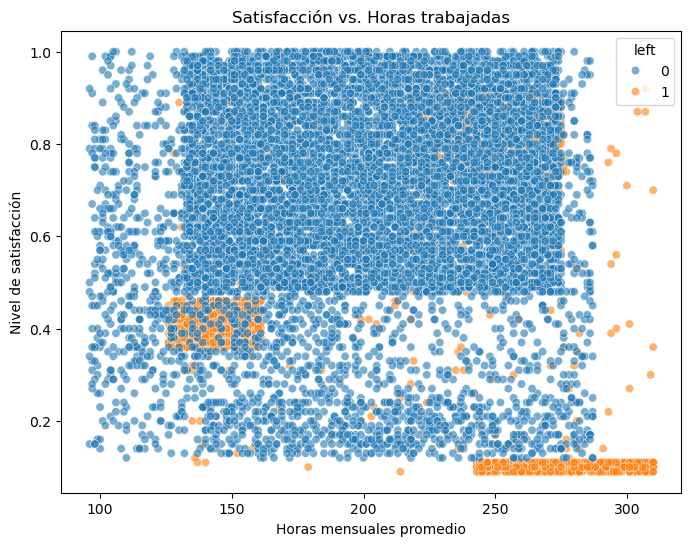

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='average_monthly_hours',
                y='satisfaction_level', hue='left', alpha=0.6)
plt.title("Satisfacción vs. Horas trabajadas")
plt.xlabel("Horas mensuales promedio")
plt.ylabel("Nivel de satisfacción")
plt.show()

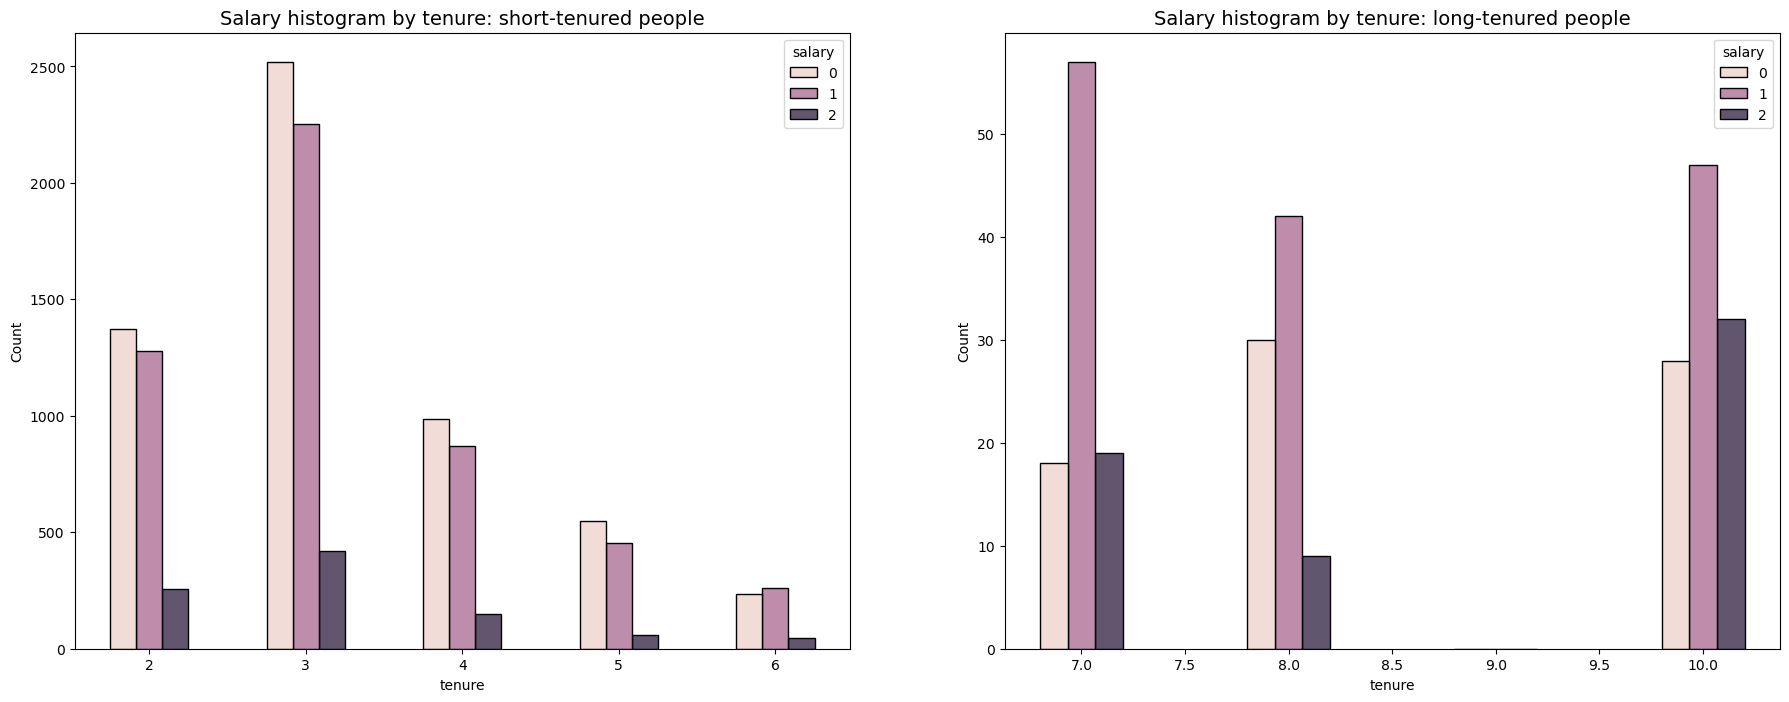

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# Define long-tenured employees
tenure_long = df[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title(
    'Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title(
    'Salary histogram by tenure: long-tenured people', fontsize='14')

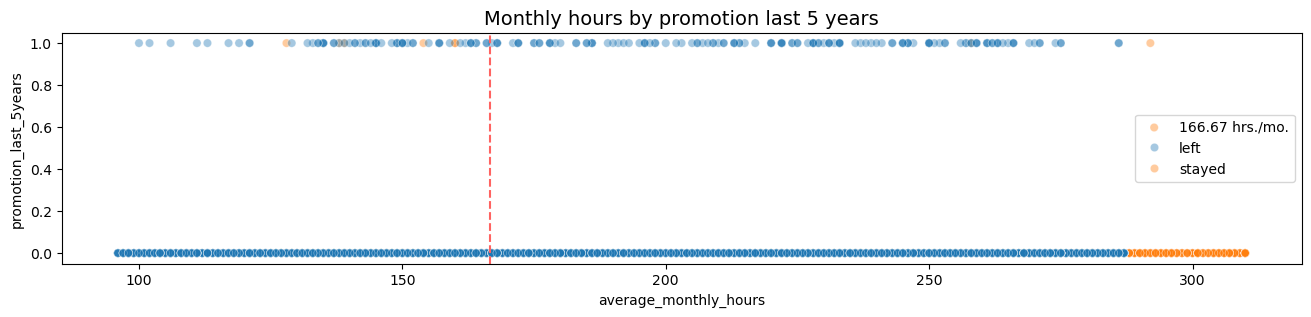

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours',
                y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

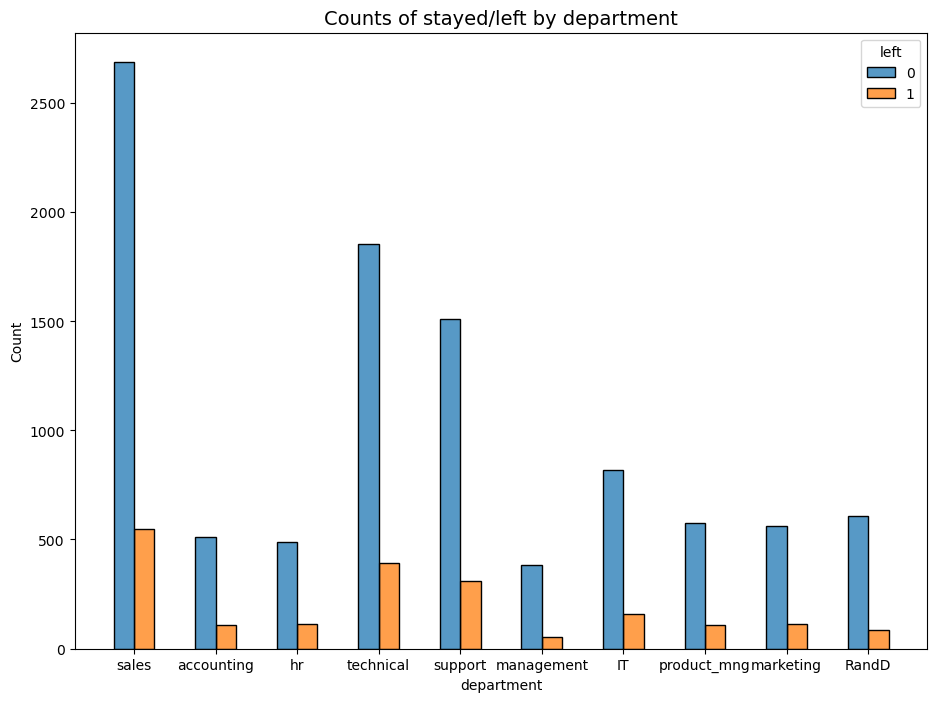

In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###

# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11, 8))
sns.histplot(data=df, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.title('Counts of stayed/left by department', fontsize=14)

In [ ]:
df2.to_csv('HR_dummies.csv', index=False)